# Determinants of Economic Growth: 
An Empirical Evaluation of the Australian Economy



aus lit rev - https://treasury.gov.au/sites/default/files/2019-03/01_Economic_geography.pdf
- https://treasury.gov.au/sites/default/files/2019-03/3demo.pdf
file:///C:/Users/kalul/Downloads/Determinants_of_Economic_Growth_An_Empirical_Evalu.pdf

1-1-1995 - 1-1-2022

real gdp - https://fred.stlouisfed.org/series/NGDPRXDCAUA

Gross fixed capital formation as a share of GDP

inflation - https://fred.stlouisfed.org/series/FPCPITOTLZGAUS 

population - https://data.worldbank.org/indicator/SP.POP.TOTL?end=2022&locations=AU&start=1995

hci - https://fred.stlouisfed.org/series/HCIYISAUA066NRUG (2019 only - might omit)

imports and exports - worldbank (to calc trade openness)

## 1. Introduction

Briefly introduce the project, its purpose, and the dataset used.
Provide background information on the Human Development Index (HDI) and its significance.

Data

Annual time series data for the period 1995 - 2022, that was obtained from World Bank Development Indicators [73, 74] was used in this study. The following variables were used: Real GDP (expressed in 2010 U.S. dollars.) at purchaser’s prices; Investment (proxied by gross fixed capital formation as a share of GDP); Inflation (measured by the consumer price index); General government expenditure as a share in GDP (General government expenditure as a share in GDP); Human Capital (representing knowledge spill over effects) was proxied by Human capital index3 , based on years of schooling and returns to education); Demography (proxied by total population); Trade openness (measured by the sum of exports and imports as a proportion of GDP); and Foreign Aid as a proportion to GDP (measured by net official development assistance and official aid received as a share of real GDP). Eviews 9.5 software was used to conduct the empirical analysis.

## 2. Data loading and preprocessing

In [75]:
real_gdp = pd.read_csv('real_gdp.csv', header = None, skiprows = 1, names = ['Year', 'Real GDP'])
real_gdp['Year'] = pd.to_datetime(real_gdp['Year']).dt.year
real_gdp

,Year,Real GDP
0,1994,1028143
1,1995,1060379
2,1996,1102405
3,1997,1148783
4,1998,1206322
5,1999,1256449
6,2000,1299006
7,2001,1334270
8,2002,1387780
9,2003,1431077


### 2.1. Loading libraries

In [76]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller test for serial correlation

# Specify notebook formatting options
sns.set_style('dark')
sns.color_palette("viridis", as_cmap=True)
sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)

In [84]:
real_gdp = pd.read_csv('real_gdp.csv', header = None, skiprows = 1, names = ['Year', 'real_gdp'])
real_gdp['Year'] = pd.to_datetime(real_gdp['Year']).dt.year
real_gdp

inflation = pd.read_csv('inflation.csv', header = None, skiprows = 1, names = ['Year', 'inflation'])
inflation['Year'] = pd.to_datetime(inflation['Year']).dt.year
inflation

population = pd.read_csv('population.csv', header = 3)
population = population.loc[population['Country Code'] == 'AUS']
population = population.drop(columns = ['Indicator Name', 'Indicator Code', 'Country Name', 'Country Code'] + [str(x) for x in range(1960, 1994)]).transpose().reset_index()
population.columns = ['Year', 'population']

exports = pd.read_csv('exports.csv', header = 3)
exports = exports.loc[exports['Country Code'] == 'AUS']
exports = exports.drop(columns = ['Indicator Name', 'Indicator Code', 'Country Name', 'Country Code'] + [str(x) for x in range(1960, 1994)]).transpose().reset_index()
exports.columns = ['Year', 'exports']
exports

imports = pd.read_csv('imports.csv', header = 3)
imports = imports.loc[imports['Country Code'] == 'AUS']
imports = imports.drop(columns = ['Indicator Name', 'Indicator Code', 'Country Name', 'Country Code'] + [str(x) for x in range(1960, 1994)]).transpose().reset_index()
imports.columns = ['Year', 'imports']
imports

gov_expenditure = pd.read_csv('gov_expenditure.csv', header = 3)
gov_expenditure = gov_expenditure.loc[gov_expenditure['Country Code'] == 'AUS']
gov_expenditure = gov_expenditure.drop(columns = ['Indicator Name', 'Indicator Code', 'Country Name', 'Country Code'] + [str(x) for x in range(1960, 1994)]).transpose().reset_index()
gov_expenditure.columns = ['Year', 'gov_expenditure']
gov_expenditure

gross_fixed_capital_formation = pd.read_csv('gross_fixed_capital_formation.csv', header = 3)
gross_fixed_capital_formation = gross_fixed_capital_formation.loc[gross_fixed_capital_formation['Country Code'] == 'AUS']
gross_fixed_capital_formation = gross_fixed_capital_formation.drop(columns = ['Indicator Name', 'Indicator Code', 'Country Name', 'Country Code'] + [str(x) for x in range(1960, 1994)]).transpose().reset_index()
gross_fixed_capital_formation.columns = ['Year', 'gross_fixed_capital_formation']
gross_fixed_capital_formation

imports = pd.read_csv('imports.csv', header = 3)
imports = imports.loc[imports['Country Code'] == 'AUS']
imports = imports.drop(columns = ['Indicator Name', 'Indicator Code', 'Country Name', 'Country Code'] + [str(x) for x in range(1960, 1994)]).transpose().reset_index()
imports.columns = ['Year', 'imports']
imports

population['Year'] = population['Year'].astype(int)
real_gdp['Year'] = real_gdp['Year'].astype(int)
inflation['Year'] = inflation['Year'].astype(int)
imports['Year'] = imports['Year'].astype(int)
exports['Year'] = exports['Year'].astype(int)
gross_fixed_capital_formation['Year'] = gross_fixed_capital_formation['Year'].astype(int)
gov_expenditure['Year'] = gov_expenditure['Year'].astype(int)

aus = (population
    .merge(right = real_gdp, on = 'Year')
    .merge(right = inflation, on = 'Year')
    .merge(right = imports, on = 'Year')
    .merge(right = exports, on = 'Year')
    .merge(right = gross_fixed_capital_formation, on = 'Year')
    .merge(right = gov_expenditure, on = 'Year')
).convert_dtypes()
aus

,Year,population,real_gdp,inflation,imports,exports,gross_fixed_capital_formation,gov_expenditure
0,1994,17805468,1028143,1.97,18.49,17.97,23.97,18.81
1,1995,18004882,1060379,4.63,19.83,17.87,25.10,18.64
2,1996,18224767,1102405,2.62,19.34,18.89,24.15,18.58
3,1997,18423037,1148783,0.22,18.85,19.13,24.04,18.27
4,1998,18607584,1206322,0.86,20.44,19.56,25.16,18.26
5,1999,18812264,1256449,1.48,20.74,18.29,25.37,18.73
6,2000,19028802,1299006,4.46,21.54,19.39,25.94,18.54
7,2001,19274701,1334270,4.41,22.07,22.15,23.20,18.54
8,2002,19495210,1387780,2.98,20.72,20.73,24.30,18.35
9,2003,19720737,1431077,2.73,21.14,19.06,26.05,18.41


### 2.2. Reading data

## 3. Exploratory Data Analysis (EDA)

## 4. ARDL model

$$
\
\Delta LGDP_t = \beta_0 + \beta_1 \Delta LGDP_{t-1} + \beta_2 \Delta LINF_{t-1} + \beta_3 \Delta LPOP_{t-1} + \beta_4 \Delta LGFCF_{t-1} + \beta_5 \Delta LIMP_{t-1} + \beta_6 \Delta LEXP_{t-1} + \beta_7 \Delta LTROP_{t-1} + \beta_8 \Delta LGEX_{t-1} + u_t\
$$


| Variable | Description |
|-|-|
| $\Delta LGDP_t$ | First difference of the logarithm of Real GDP |
| $\Delta LGDP_{t-1}$ | First-order lagged difference of the logarithm of Real GDP |
| $\Delta LINF_{t-1}$ | First-order lagged difference of the logarithm of Inflation |
| $\Delta LPOP_{t-1}$ | First-order lagged difference of the logarithm of Population |
| $\Delta LGFCF_{t-1}$ | First-order lagged difference of the logarithm of Gross Fixed Capital Formation |
| $\Delta LIMP_{t-1}$ | First-order lagged difference of the logarithm of Imports |
| $\Delta LEXP_{t-1}$ | First-order lagged difference of the logarithm of Exports |
| $\Delta LTROP_{t-1}$ | First-order lagged difference of the logarithm of Trade Openness |
| $\Delta LGEX_{t-1}$| First-order lagged difference of the logarithm of Government Expenditure |



### Diagnostic tests
Stationarity Tests:

Test for stationarity using unit root tests such as the Augmented Dickey-Fuller (ADF) test or the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test. This helps determine if differencing or transformations are necessary.
Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF):

Examine the ACF and PACF plots to identify potential autocorrelation and partial autocorrelation patterns. This helps in selecting appropriate orders for autoregressive (AR) and moving average (MA) terms in ARIMA modeling.
Ljung-Box Test for Residuals Autocorrelation:

After fitting a model, conduct the Ljung-Box test on the residuals to check for remaining autocorrelation. This test helps ensure that the model adequately captures temporal dependencies.
Normality Test for Residuals:

Check the normality of the residuals using statistical tests such as the Jarque-Bera test or the Shapiro-Wilk test. Normality is an important assumption, especially for linear models.
Heteroscedasticity Test:

Examine the residuals for heteroscedasticity, which is the presence of changing variance over time. Tests like the Breusch-Pagan test or the White test can be used for this purpose.
Outlier Detection:

Identify and investigate potential outliers using statistical methods or visualization techniques. Outliers can significantly impact model performance.
Model Fit Assessment:

Evaluate the overall fit of the chosen model using goodness-of-fit measures like the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), or Mean Squared Error (MSE).
Forecast Accuracy Evaluation:

If you're forecasting, assess the accuracy of your forecasts using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or others relevant to your problem.
Residuals Plots:

Visualize the residuals to ensure they exhibit randomness and do not show any systematic patterns.
Cross-Validation:

If applicable, perform cross-validation to assess how well your model generalizes to new, unseen data.

#### Unit root test
Unit roots/stationarity tests were conducted because this is a prime requirement for any co-integration and causality tests. The augmented Dickey-Fuller test was used to test for a unit root in a univariate process in the presence of serial correlation.

ADF test hypotheses: 
* **H0**: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.
* **HA**: The time series is stationary.

The ADF test results were augmented with the Phillips-Perron test. Table 1 presents the results of the unit root tests.

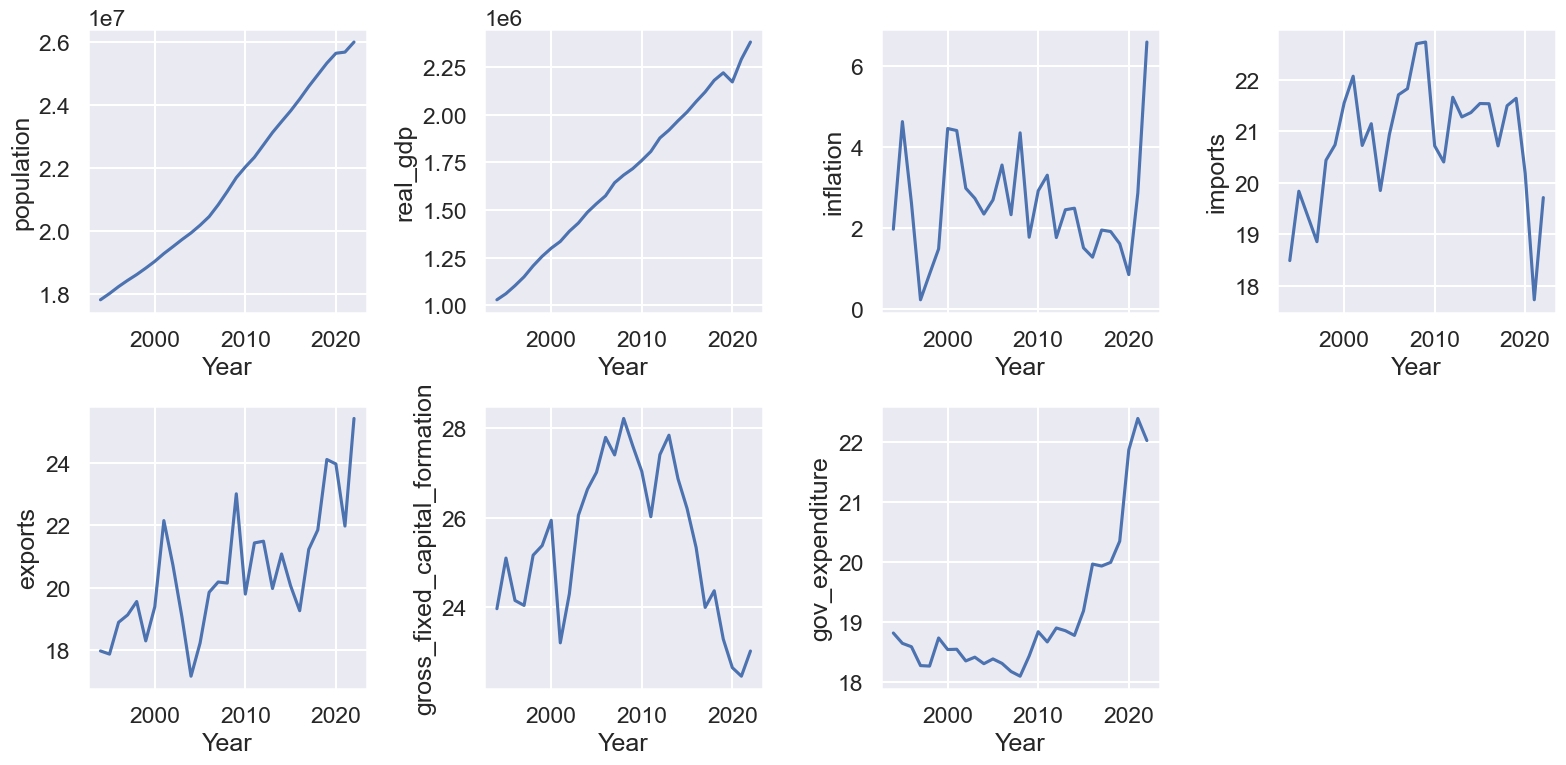

In [122]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (16, 8))

sns.lineplot(data = aus, x = 'Year', y = 'population', ax = ax[0, 0])
sns.lineplot(data = aus, x = 'Year', y = 'real_gdp', ax = ax[0, 1])
sns.lineplot(data = aus, x = 'Year', y = 'inflation', ax = ax[0, 2])
sns.lineplot(data = aus, x = 'Year', y = 'imports', ax = ax[0, 3])
sns.lineplot(data = aus, x = 'Year', y = 'exports', ax = ax[1, 0])
sns.lineplot(data = aus, x = 'Year', y = 'gross_fixed_capital_formation', ax = ax[1, 1])
sns.lineplot(data = aus, x = 'Year', y = 'gov_expenditure', ax = ax[1, 2])

fig.delaxes(ax = ax[1, 3])
plt.tight_layout()
plt.show()

Level form

In [123]:
def adf_results(dataset):
    results = []

    # Iterate through each column (except 'Year')
    for column in dataset.columns[1:]:
        if column != 'Year':

            result = adfuller(dataset[column])

            results.append({
                'Variable': column,
                'ADF Statistic': result[0],
                'p-value': result[1],
                'Number of Lags Used': result[2],
                'Number of Observations Used': result[3],
                'Critical Values (1%)': result[4]['1%'],
                'Critical Values (5%)': result[4]['5%'],
                'Critical Values (10%)': result[4]['10%'],
                'Maximised Information Criterion (IC)': result[5]
            })

    results_df = pd.DataFrame(results)

    return results_df

adf_results(aus)

,Variable,ADF Statistic,p-value,Number of Lags Used,Number of Observations Used,Critical Values (1%),Critical Values (5%),Critical Values (10%),Maximised Information Criterion (IC)
0,population,0.83,0.99,1,27,-3.70,-2.98,-2.63,490.28
1,real_gdp,0.82,0.99,8,20,-3.81,-3.02,-2.65,440.33
2,inflation,-3.07,0.03,0,28,-3.69,-2.97,-2.63,66.16
3,imports,-2.55,0.10,1,27,-3.70,-2.98,-2.63,56.69
4,exports,-1.86,0.35,0,28,-3.69,-2.97,-2.63,76.40
5,gross_fixed_capital_formation,-1.34,0.61,0,28,-3.69,-2.97,-2.63,47.89
6,gov_expenditure,3.20,1.00,3,25,-3.72,-2.99,-2.63,17.10


Among the variables tested at the level, **'Inflation'** and **'Imports'** exhibit evidence of stationarity, with ADF statistics falling below critical values at the 5% significance level. In contrast, **'Population'**, **'Real GDP'**, **'Exports'**, **'Gross Fixed Capital Formation'**, and **'Government Expenditure'** fail to reject the null hypothesis, indicating non-stationarity.

Log transformed

In [95]:
aus_log = aus.copy()

for variable in ['population', 'real_gdp', 'inflation', 'imports', 'exports', 'gross_fixed_capital_formation', 'gov_expenditure']:
    aus_log[f'l_{variable}'] = np.log(aus_log[variable])
aus_log = aus_log.drop(columns=['population', 'real_gdp', 'inflation', 'imports', 'exports', 'gross_fixed_capital_formation', 'gov_expenditure'])

aus_log.head()

,Year,l_population,l_real_gdp,l_inflation,l_imports,l_exports,l_gross_fixed_capital_formation,l_gov_expenditure
0,1994,16.70,13.84,0.68,2.92,2.89,3.18,2.93
1,1995,16.71,13.87,1.53,2.99,2.88,3.22,2.93
2,1996,16.72,13.91,0.96,2.96,2.94,3.18,2.92
3,1997,16.73,13.95,-1.49,2.94,2.95,3.18,2.91
4,1998,16.74,14.00,-0.15,3.02,2.97,3.23,2.90


In [96]:
adf_results(aus_log)

,Variable,ADF Statistic,p-value,Number of Lags Used,Number of Observations Used,Critical Values (1%),Critical Values (5%),Critical Values (10%),Maximised Information Criterion (IC)
0,l_population,-0.01,0.96,1,27,-3.70,-2.98,-2.63,-156.17
1,l_real_gdp,-3.05,0.03,8,20,-3.81,-3.02,-2.65,-111.60
2,l_inflation,-3.48,0.01,0,28,-3.69,-2.97,-2.63,26.77
3,l_imports,-2.52,0.11,1,27,-3.70,-2.98,-2.63,-57.39
4,l_exports,-1.95,0.31,0,28,-3.69,-2.97,-2.63,-40.01
5,l_gross_fixed_capital_formation,-1.33,0.61,0,28,-3.69,-2.97,-2.63,-75.74
6,l_gov_expenditure,2.95,1.00,3,25,-3.72,-2.99,-2.63,-95.97


Among the logged variables tested at the level, **'l_Real GDP'**, **'l_Inflation'**, and **'l_Imports'** show evidence of stationarity, as reflected by ADF statistics below critical values at the 5% significance level. Conversely, **'l_Population'**, **'l_Exports'**, **'l_Gross Fixed Capital Formation'**, and **'l_Government Expenditure'** fail to reject the null hypothesis, suggesting non-stationarity even after the natural logarithmic transformation.

First difference

In [99]:
aus_diff = aus_log.copy()
aus_diff.iloc[:, 1:] = aus_diff.iloc[:, 1:].diff().dropna()
aus_diff = aus_diff.loc[1:, :]
aus_diff = aus_diff.rename(columns={
    'l_population': 'd_l_population',
    'l_real_gdp': 'd_l_real_gdp',
    'l_inflation': 'd_l_inflation',
    'l_imports': 'd_l_imports',
    'l_exports': 'd_l_exports',
    'l_gross_fixed_capital_formation': 'd_l_gross_fixed_capital_formation',
    'l_gov_expenditure': 'd_l_gov_expenditure'
})
aus_diff.head()

,Year,d_l_population,d_l_real_gdp,d_l_inflation,d_l_imports,d_l_exports,d_l_gross_fixed_capital_formation,d_l_gov_expenditure
1,1995,0.01,0.03,0.85,0.07,-0.01,0.05,-0.01
2,1996,0.01,0.04,-0.57,-0.03,0.06,-0.04,-0.00
3,1997,0.01,0.04,-2.45,-0.03,0.01,-0.00,-0.02
4,1998,0.01,0.05,1.34,0.08,0.02,0.05,-0.00
5,1999,0.01,0.04,0.54,0.01,-0.07,0.01,0.03


In [100]:
adf_results(aus_diff)

,Variable,ADF Statistic,p-value,Number of Lags Used,Number of Observations Used,Critical Values (1%),Critical Values (5%),Critical Values (10%),Maximised Information Criterion (IC)
0,d_l_population,-2.74,0.07,0,27,-3.70,-2.98,-2.63,-147.55
1,d_l_real_gdp,-3.28,0.02,1,26,-3.71,-2.98,-2.63,-97.83
2,d_l_inflation,-5.41,0.00,2,25,-3.72,-2.99,-2.63,30.01
3,d_l_imports,-4.90,0.00,1,26,-3.71,-2.98,-2.63,-52.46
4,d_l_exports,-3.04,0.03,9,18,-3.86,-3.04,-2.66,-43.24
5,d_l_gross_fixed_capital_formation,-5.36,0.00,0,27,-3.70,-2.98,-2.63,-71.55
6,d_l_gov_expenditure,-1.01,0.75,3,24,-3.74,-2.99,-2.64,-88.55


After applying first differencing to the logged variables, ADF statistics indicate that **'d_l_Real GDP'**, **'d_l_Inflation'**, **'d_l_Imports'**, and **'d_l_Exports'** exhibit evidence of stationarity, with p-values below critical values at the 5% significance level. On the other hand, **'d_l_Population'**, **'d_l_Gross Fixed Capital Formation'**, and **'d_l_Government Expenditure'** fail to reject the null hypothesis, suggesting persisting non-stationarity even after the combination of natural logarithmic transformation and differencing.

In [140]:
from arch.unitroot import PhillipsPerron
pp = PhillipsPerron(aus['inflation'], test_type="rho", trend="ct", lags=12)
print(pp.summary().as_text())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).